# NLP - DISNEYLAND REVIEWS 

Context : 

Disneyland Park is most certainly a land of enchantment where children and the young at heart find that dreams really do come true. Disneyland Park is a seamless blend of yesterday, today and tomorrow. Smiling train conductors, marching bands and the clip-clop of horse drawn carriages bring you back to carefree days. You can also rocket through the galaxy, board a runaway train or trek through the jungle. Laughter is always in the air, with friendly smiles all around. The secret to Disneyland is its ability to change yet, remain the same. 

As Walt Disney said "Disneyland will never be completed. It will continue to grow as long as there is imagination left in the world."


![img](E:\\DataScience\\ProjetDS\\Exercice\\NLP_Disneyland_Reviews\\img\\Disney2.jpg)

## Library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("E:\\DataScience\\ProjetDS\\Exercice\\NLP_Disneyland_Reviews\\DisneylandReviews.csv",encoding="latin-1")
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [3]:
df.describe()

,Review_ID,Rating
count,4.265600e+04,42656.000000
mean,3.188553e+08,4.217695
std,1.657092e+08,1.063371
min,1.398724e+06,1.000000
25%,1.743274e+08,4.000000
50%,2.907583e+08,5.000000
75%,4.489579e+08,5.000000
max,6.708014e+08,5.000000


In [4]:
df.columns

Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch'],
      dtype='object')

In [5]:
df.dtypes

Review_ID             int64
Rating                int64
Year_Month           object
Reviewer_Location    object
Review_Text          object
Branch               object
dtype: object

In [6]:
df.isnull().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [8]:
df.shape

(42656, 6)

In [9]:
df1 = df.drop('Review_ID',axis=1)

In [10]:
#Check NaN Values :
NaN = [(c, df1[c].isna().mean()*100) for c in df1]
NaN = pd.DataFrame(NaN,columns=['column_name','Percentage'])
NaN.sort_values("Percentage",ascending=False)

,column_name,Percentage
0,Rating,0.0
1,Year_Month,0.0
2,Reviewer_Location,0.0
3,Review_Text,0.0
4,Branch,0.0


In [11]:
df1.describe()

,Rating
count,42656.000000
mean,4.217695
std,1.063371
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


## Feature Engineering

In [12]:
# Date time manipulation:
# Convertir la colonne "Year_Month" en format datetime. Les valeurs invalides seront converties en NaN.
df1.Year_Month = df1.Year_Month.apply(pd.to_datetime, errors="coerce")

# Extraire le mois à partir de la colonne "Year_Month" et le stocker dans une nouvelle colonne appelée "month"
df1["month"] = df1.Year_Month.dt.month

# Extraire l'année à partir de la colonne "Year_Month" et le stocker dans une nouvelle colonne appelée "year"
df1["year"] = df1.Year_Month.dt.year

# Supprimer la colonne "Year_Month" de l'ensemble de données (DataFrame) df1
df1.drop("Year_Month", axis=1, inplace=True)

In [13]:
df1['review length']=df1['Review_Text'].apply(lambda x:len(x))

In [14]:
df1.head()

,Rating,Reviewer_Location,Review_Text,Branch,month,year,review length
0,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,4.0,2019.0,329
1,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,5.0,2019.0,970
2,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,4.0,2019.0,938
3,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,4.0,2019.0,485
4,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,4.0,2019.0,163


In [15]:
!pip install textblob
!pip install nltk 

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [16]:
df1['Review_Text'][:3]

0    If you've ever been to Disneyland anywhere you...
1    Its been a while since d last time we visit HK...
2    Thanks God it wasn   t too hot or too humid wh...
Name: Review_Text, dtype: object

In [17]:
#df["Review_Text"] = df["Review_Text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [18]:
#Convert to lowcase:
df1['Review_Text'] = df1['Review_Text'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [19]:
df1['Review_Text'][:3]

0    if you've ever been to disneyland anywhere you...
1    its been a while since d last time we visit hk...
2    thanks god it wasn t too hot or too humid when...
Name: Review_Text, dtype: object

In [20]:
# Removing numerical values with "\d" and  using regex:
df1['Review_Text'] = df1['Review_Text'].replace('\d','', regex=True)

In [21]:
df1['Review_Text'][:3]

0    if you've ever been to disneyland anywhere you...
1    its been a while since d last time we visit hk...
2    thanks god it wasn t too hot or too humid when...
Name: Review_Text, dtype: object

In [22]:
#Removing punctuation with "[^\w\s] and  using regex:
df1['Review_Text'] = df1['Review_Text'].replace("[^\w\s]", "", regex=True)

In [23]:
#df1["Review_Text"] = df1["Review_Text"].str.replace("[^\w\s]","")

In [24]:
df1['Review_Text'][:3]

0    if youve ever been to disneyland anywhere youl...
1    its been a while since d last time we visit hk...
2    thanks god it wasn t too hot or too humid when...
Name: Review_Text, dtype: object

In [25]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
df["Review_Text"] = df["Review_Text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mehme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# VERSION FOR DATALORE

# import pandas as pd
# import nltk
# 
# # Spécifier le répertoire parent de "/data/notebook_files/Stopwords"
# nltk.data.path.append("/data/notebook_files")
# 
# # Télécharger les données des stopwords
# nltk.download('stopwords', download_dir="/data/notebook_files")
# 
# # Importer les stopwords
# from nltk.corpus import stopwords
# sw = stopwords.words("english")
# 
# # STOPWORDS :
# df1['Review_Text'] = df1['Review_Text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [27]:
df1['Review_Text'][:3]

0    if youve ever been to disneyland anywhere youl...
1    its been a while since d last time we visit hk...
2    thanks god it wasn t too hot or too humid when...
Name: Review_Text, dtype: object

In [28]:
# LEMMATIZATION
from textblob import Word
nltk.download("wordnet")
nltk.download("omw-1.4")
df["Review_Text"] = df["Review_Text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mehme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mehme\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [29]:
# VERSION FOR DATALORE ---

# import pandas as pd
# import nltk
# from textblob import Word
# 
# 
# # Spécifier le répertoire parent pour les ressources NLTK et TextBlob
# nltk.data.path.append("/data/notebook_files")
# 
# # Télécharger les ressources pour la lemmatisation
# nltk.download("wordnet", download_dir="/data/notebook_files")
# nltk.download("omw-1.4", download_dir="/data/notebook_files")
# #nltk.download('punkt',download_dir="/data/notebook_files")
# nltk.download('averaged_perceptron_tagger', download_dir="/data/notebook_files")
# 
# # Lemmatization :
# df1['Review_Text'] = df1['Review_Text'].apply(lambda x: " ".join([Word(x).lemmatize() for word in x.split()]))
# 

In [30]:
df1["Review_Text"][:5]

0    if youve ever been to disneyland anywhere youl...
1    its been a while since d last time we visit hk...
2    thanks god it wasn t too hot or too humid when...
3    hk disneyland is a great compact park unfortun...
4    the location is not in the city took around  h...
Name: Review_Text, dtype: object

In [31]:
from nltk.tokenize import word_tokenize

text = "Ceci est un exemple de phrase."

# Tokenization des mots
tokens = word_tokenize(text)

# Affichage des tokens
print(tokens)

['Ceci', 'est', 'un', 'exemple', 'de', 'phrase', '.']


In [32]:
# Word Tokenization
#from nltk.tokenize import word_tokenize

#df1['tokens'] = df1['Review_Text'].apply(lambda x: TextBlob(x).words)

In [33]:
from nltk.tokenize import word_tokenize

df1['tokens'] = df1['Review_Text'].apply(lambda x: word_tokenize(x))

In [34]:
from nltk.tokenize import word_tokenize

df1['tokens'] = df1['Review_Text'].apply(word_tokenize)

In [35]:
df1[["Review_Text","tokens"]][:5]

,Review_Text,tokens
0,if youve ever been to disneyland anywhere youl...,"[if, youve, ever, been, to, disneyland, anywhe..."
1,its been a while since d last time we visit hk...,"[its, been, a, while, since, d, last, time, we..."
2,thanks god it wasn t too hot or too humid when...,"[thanks, god, it, wasn, t, too, hot, or, too, ..."
3,hk disneyland is a great compact park unfortun...,"[hk, disneyland, is, a, great, compact, park, ..."
4,the location is not in the city took around h...,"[the, location, is, not, in, the, city, took, ..."


In [36]:
#Frequency Analysis :

df1['frequency']  = df1['Review_Text'].apply(lambda x: len(str(x).split(" ")))

In [37]:
# Supposez que vous avez une colonne "Texte" dans votre DataFrame "df"
index_ligne_texte_plus_long = df['Review_Text'].str.len().idxmax()
ligne_texte_plus_long = df.loc[index_ligne_texte_plus_long]

# Afficher la ligne contenant le texte le plus long
print(ligne_texte_plus_long)

Review_ID                                                    110066682
Rating                                                               4
Year_Month                                                      2011-5
Reviewer_Location                                       United Kingdom
Review_Text          After visited Disneyland Paris least 20 times ...
Branch                                                Disneyland_Paris
Name: 42023, dtype: object


In [38]:
ligne_texte_plus_long[4]

"After visited Disneyland Paris least 20 times past year, I come realize secret good time much knowing NOT TO DO knowing do. So, one first things I tell people schedule families. One must reign one's expectations. You cannot 20 rides one day. It unlikely able 10. Even park completely empty, HUGE takes quite bit time walk point A point B, particularly Magic Kingdom side. Most people really take consideration. For example, get Fast Pass Buzz Lightyear ride think nip Pirates Caribbean wait, may nasty surprise. These things quite distance other, P.O.C line all, might make it. Personally, I consider really good day go 4 rides see couple shows. Once throw lunch, full day...believe me. But never fails people get park, start rushing around manic expressions twitching eyes. Don't torture yourself. It better fewer things (and enjoy them) try squeeze everything make everyone miserable. But, going go fewer rides attractions, need make rides count ...meaning family leaves ride good experience. With

In [39]:
df1.groupby('frequency').max()
df1[df1["Review_Text"].str.contains("visited disneyland paris least")]
longest_comment = df.iloc[42023,3]

In [40]:
longest_comment_tags=TextBlob(longest_comment).tags

In [41]:
df['Review_Text'].describe()

count                                                 42656
unique                                                42631
top       My first visit June everything I hoped would b...
freq                                                      2
Name: Review_Text, dtype: object

In [42]:
df1.head()

,Rating,Reviewer_Location,Review_Text,Branch,month,year,review length,tokens,frequency
0,4,Australia,if youve ever been to disneyland anywhere youl...,Disneyland_HongKong,4.0,2019.0,329,"[if, youve, ever, been, to, disneyland, anywhe...",59
1,4,Philippines,its been a while since d last time we visit hk...,Disneyland_HongKong,5.0,2019.0,970,"[its, been, a, while, since, d, last, time, we...",171
2,4,United Arab Emirates,thanks god it wasn t too hot or too humid when...,Disneyland_HongKong,4.0,2019.0,938,"[thanks, god, it, wasn, t, too, hot, or, too, ...",169
3,4,Australia,hk disneyland is a great compact park unfortun...,Disneyland_HongKong,4.0,2019.0,485,"[hk, disneyland, is, a, great, compact, park, ...",91
4,4,United Kingdom,the location is not in the city took around h...,Disneyland_HongKong,4.0,2019.0,163,"[the, location, is, not, in, the, city, took, ...",31


## Data Visualization

In [43]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [44]:
#CONVERT ALL REVIEWS TO SINGLE TEXT :

text = " ".join(i for i in df1.Review_Text)

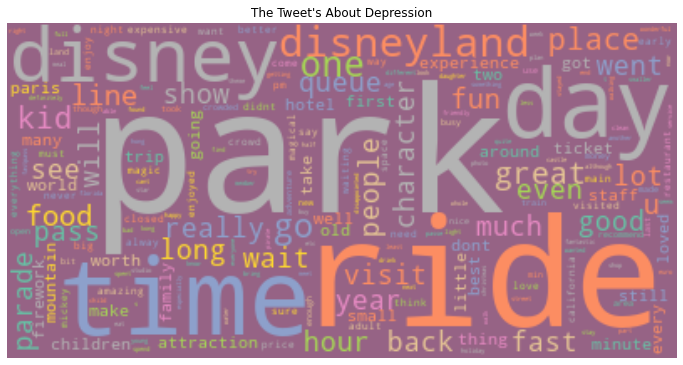

In [45]:
#WordCloud VIZ : 

wordcloud = WordCloud(background_color="#966385",
                      colormap="Set2",
                      collocations=False).generate(text)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.title("The Tweet's About Depression")
plt.show()

In [46]:
#MOST COMMON WORDS 
print("\n",
      "\n",text.count("disney"),
      "\n",text.count("park"),
      "\n",text.count("ride"),
      "\n",text.count("day"),
      "\n",text.count("time"),
      "\n",text.count("disneyland"),
      "\n",text.count("great"),
      "\n",text.count("really"),
      "\n",text.count("children"),
      "\n",text.count("minute"),
     )


 
 73168 
 57501 
 54146 
 48963 
 41484 
 33951 
 16969 
 12447 
 8619 
 8461


In [47]:
data = {
    "title":['disney',"park","ride","day","time","disneyland",
             "great","really","children","minute"],
    "count":[73168, 57501, 54146, 48963, 41484, 33951, 16969, 12447, 8619, 8461]
}

In [48]:
data = pd.DataFrame(data)
data.head(10)

,title,count
0,disney,73168
1,park,57501
2,ride,54146
3,day,48963
4,time,41484
5,disneyland,33951
6,great,16969
7,really,12447
8,children,8619
9,minute,8461


[Text(0.5, 1.0, 'Most Common Words:')]

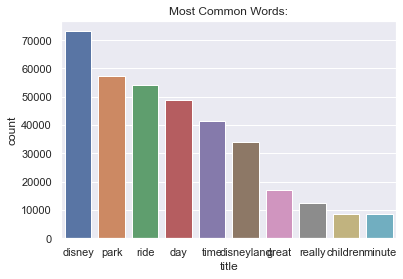

In [49]:
sns.set_style("whitegrid")
sns.despine(left=True,bottom=True)
sns.set_context('poster',font_scale=.5,rc={"grid.linewidth":0.6})
sns.set(rc = {"figure.figsize":(12,10)})
sns.barplot(data=data ,x="title",y="count").set(title = "Most Common Words:")

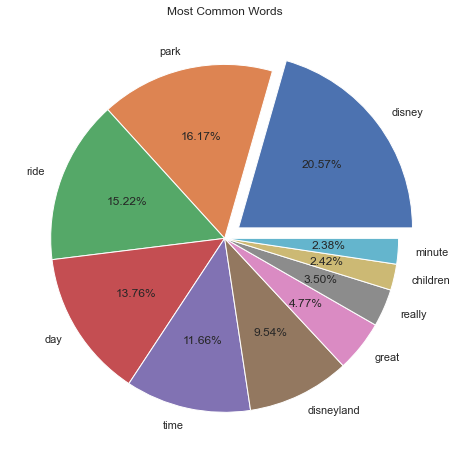

In [50]:
import matplotlib.pyplot as plt

# Création de la figure pour la visualisation
fig = plt.figure(figsize=(12, 8))

# Paramètres pour l'explosion des parts de la pie chart
myexplode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Tracer la pie chart avec les données fournies
plt.pie(data['count'], labels=data["title"], autopct="%1.2f%%", explode=myexplode)

# Titre du graphique
plt.title("Most Common Words")

# Affichage de la visualisation
plt.show()


[Text(0.5, 1.0, 'Rating of Reviews:')]

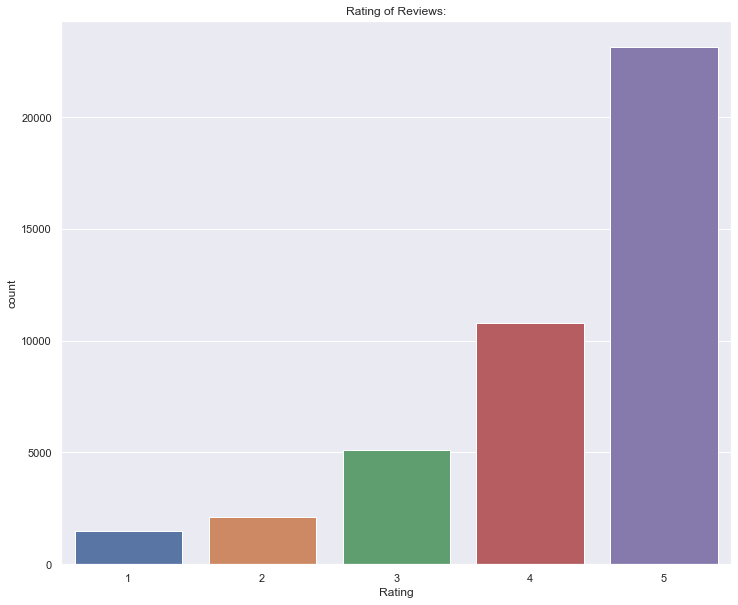

In [51]:
#RATING OF REVIEWS : 

sns.set_style("whitegrid")
sns.despine(left=True,bottom=True)
sns.set_context('poster',font_scale=.5,rc={"grid.linewidth":0.6})
sns.set(rc = {"figure.figsize":(12,8)})
sns.countplot(data=df1,x="Rating").set(title="Rating of Reviews:")

In [52]:
df1['Branch'].describe()

count                     42656
unique                        3
top       Disneyland_California
freq                      19406
Name: Branch, dtype: object

In [53]:
df1['Branch'].unique()

array(['Disneyland_HongKong', 'Disneyland_California', 'Disneyland_Paris'],
      dtype=object)

[Text(0.5, 1.0, 'Branch Amount')]

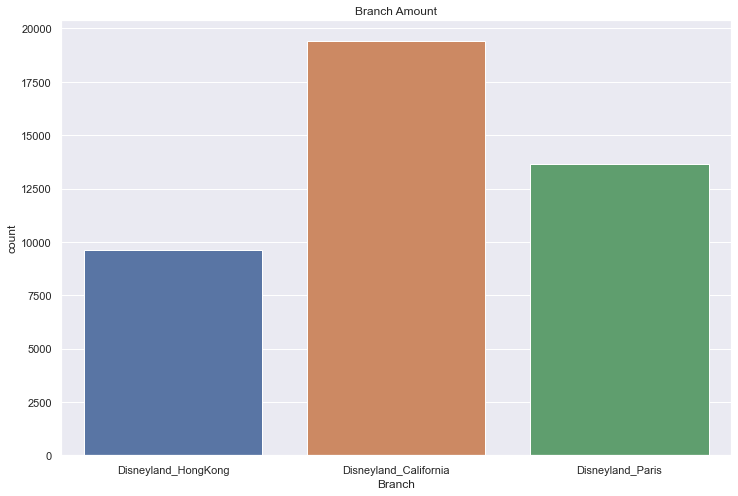

In [54]:
#Branch amount 
sns.set_style("whitegrid")
sns.despine(left=True,bottom=True)
sns.set_context("poster",font_scale=.5,rc={"grid.linewidth":0.6})
sns.set(rc = {"figure.figsize":(12,8)})
sns.countplot(data = df1 ,x="Branch").set(title="Branch Amount")

[Text(0.5, 1.0, 'Month amount :')]

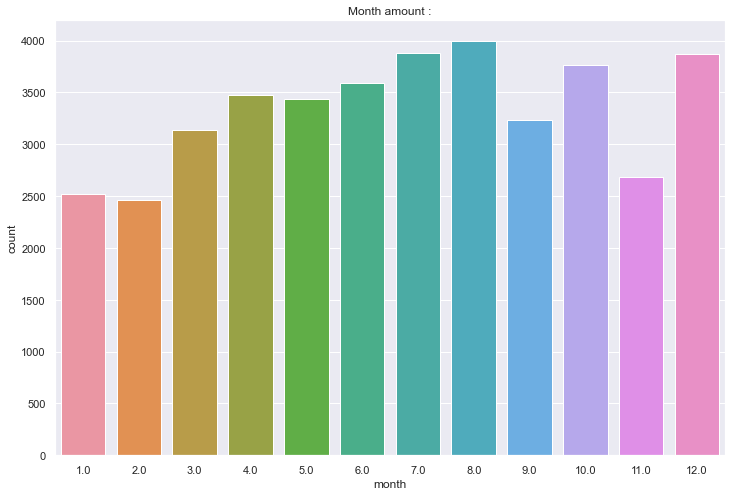

In [55]:
#Mount Amount
sns.set_style("whitegrid")
sns.despine(left=True,bottom=True)
sns.set_context("poster",font_scale=.5,rc={"grid.linewidth":0.6})
sns.set(rc ={"figure.figsize":(12,8)})
sns.countplot(data = df1,x="month").set(title = "Month amount :")

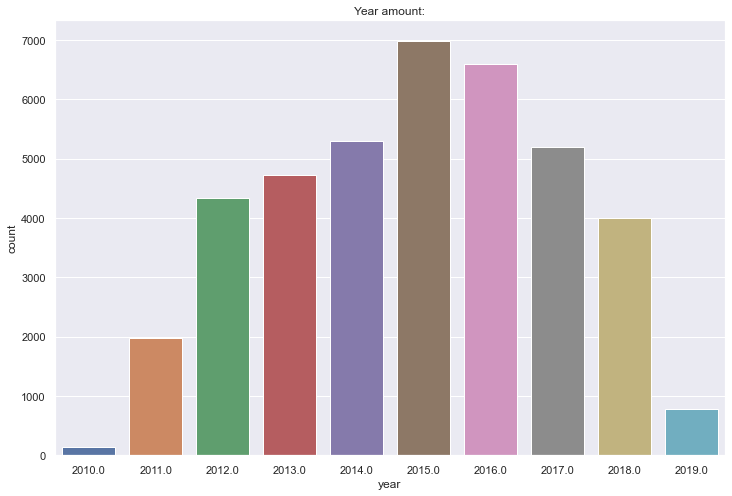

In [56]:
#YEAR AMOUNT
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,8)})
sns.countplot(data=df1, x="year").set(title="Year amount:");


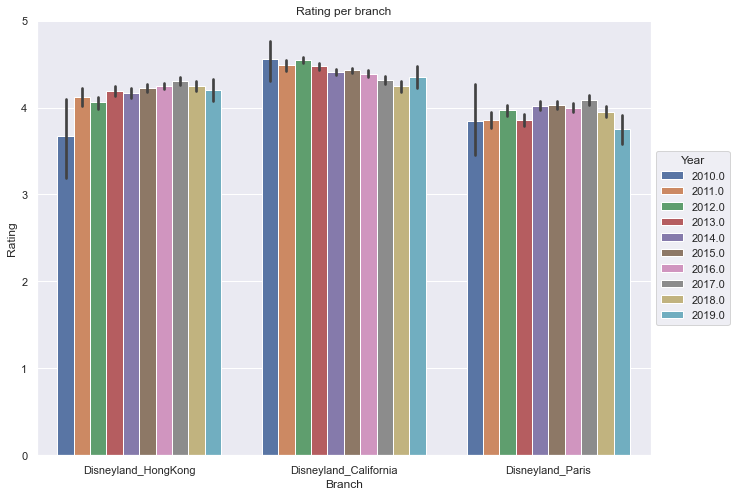

In [57]:
#RATING PER BRANCH
# Configuration du style et de la taille de la figure
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale=0.5, rc={"grid.linewidth": 0.6})
sns.set(rc={"figure.figsize": (12, 10)})

# Tracé de la barplot avec la légende positionnée à droite et à l'extérieur du graphique
ax = sns.barplot(data=df1, x="Branch", y="Rating", hue="year")
ax.set(title="Rating per branch")
ax.legend(title="Year", loc="center left", bbox_to_anchor=(1, 0.5))

# Affichage de la barplot
plt.show()


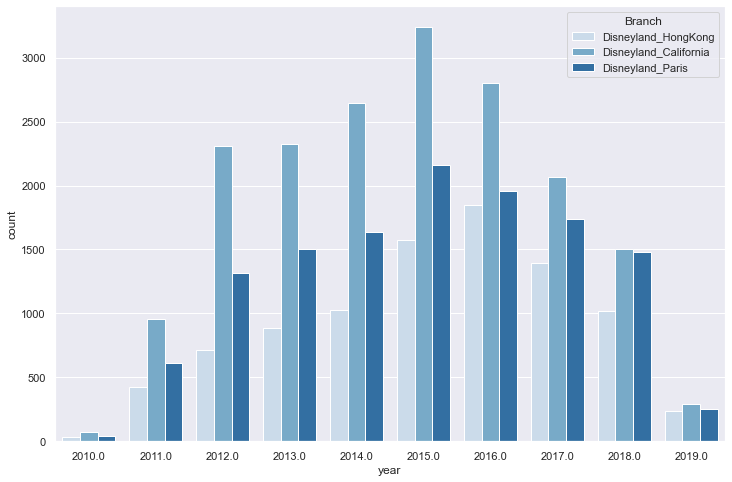

In [58]:
plt.figure(figsize=(12,8))
sns.countplot(data=df1,x='year',hue='Branch',palette='Blues');

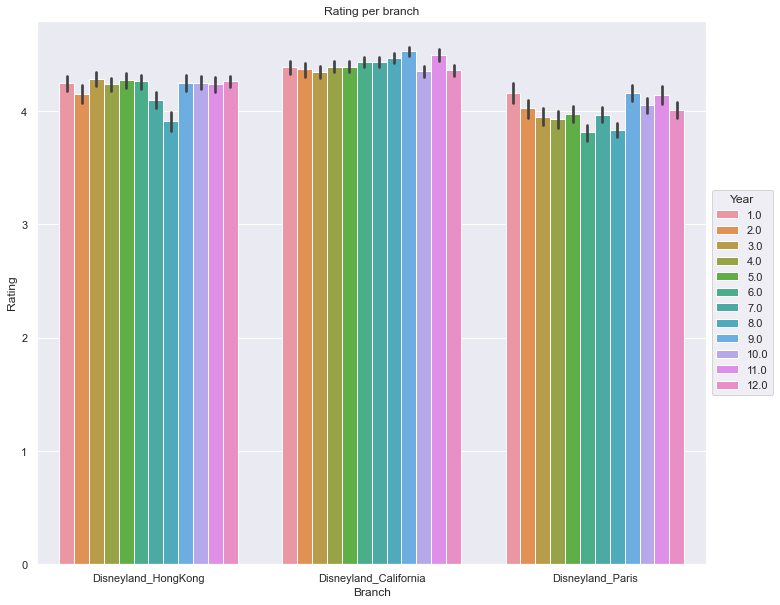

In [59]:
#RATING OF BRANCH PER MONTH: 

# Configuration du style et de la taille de la figure
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale=0.5, rc={"grid.linewidth": 0.6})
sns.set(rc={"figure.figsize": (12, 10)})

# Tracé de la barplot avec la légende positionnée à droite et à l'extérieur du graphique
ax = sns.barplot(data=df1, x="Branch", y="Rating", hue="month")
ax.set(title="Rating per branch")
ax.legend(title="Year", loc="center left", bbox_to_anchor=(1, 0.5))

# Affichage de la barplot
plt.show()


In [60]:
#Country per reviews
fig_df=df1.groupby('Reviewer_Location',as_index=False).agg({'Branch':'count'}).sort_values('Branch',ascending=False)
fig = px.choropleth(fig_df, 
                    locations='Reviewer_Location', locationmode='country names',
                    color='Branch',
                    color_continuous_scale="portland", hover_data=['Branch'],
                    title='Country - Reviews')
fig.update(layout_coloraxis_showscale=False)
fig.show();

[Text(0.5, 1.0, 'Lineplot of rating')]

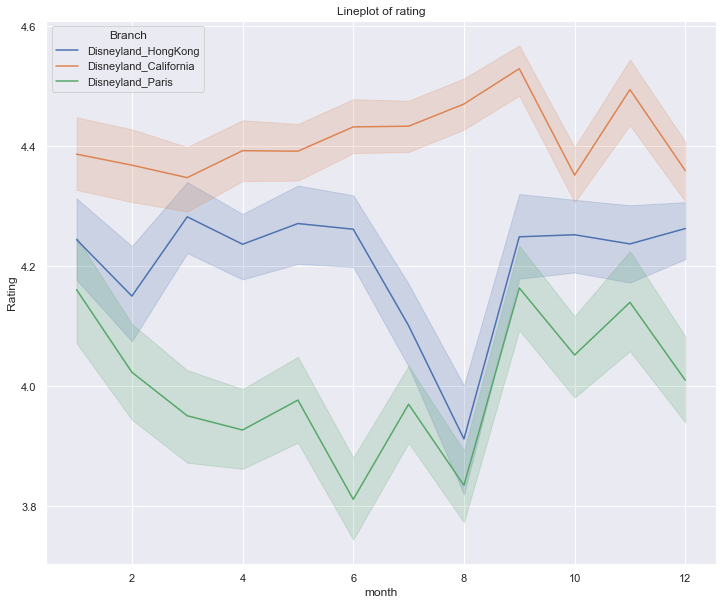

In [61]:
#Lineplot of rating

sns.lineplot(data = df1, x="month",y="Rating",hue="Branch").set(title="Lineplot of rating")

[Text(0.5, 1.0, 'Line of Year/Rating')]

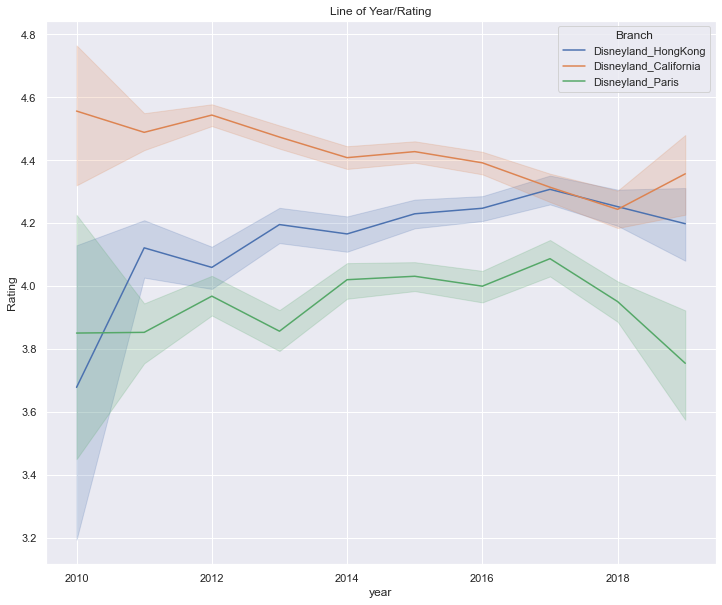

In [62]:
#LINEPLOT OF YEAR / RATING: 
sns.lineplot(data = df1,x="year",y = "Rating",hue = "Branch").set(title="Line of Year/Rating")

## Sentiment Analysis Using TextBlob 

In [63]:
from textblob import TextBlob

### Applying sentiment to entire dataset

In [64]:
blob_1 = []
for i in df1['Review_Text']:
    blob = TextBlob(i).sentiment
    blob_1.append(blob) 

### Adding new DF

In [65]:
dfBlob = pd.DataFrame(blob_1)

In [66]:
dfBlob.head()

,polarity,subjectivity
0,0.239352,0.561481
1,0.233333,0.434649
2,0.160498,0.422944
3,0.189286,0.512143
4,0.266667,0.437500


In [67]:
#Combining two datasets :

dfBlob2 = pd.concat([df1.reset_index(drop=True),dfBlob],axis=1)
dfBlob2.head()

,Rating,Reviewer_Location,Review_Text,Branch,month,year,review length,tokens,frequency,polarity,subjectivity
0,4,Australia,if youve ever been to disneyland anywhere youl...,Disneyland_HongKong,4.0,2019.0,329,"[if, youve, ever, been, to, disneyland, anywhe...",59,0.239352,0.561481
1,4,Philippines,its been a while since d last time we visit hk...,Disneyland_HongKong,5.0,2019.0,970,"[its, been, a, while, since, d, last, time, we...",171,0.233333,0.434649
2,4,United Arab Emirates,thanks god it wasn t too hot or too humid when...,Disneyland_HongKong,4.0,2019.0,938,"[thanks, god, it, wasn, t, too, hot, or, too, ...",169,0.160498,0.422944
3,4,Australia,hk disneyland is a great compact park unfortun...,Disneyland_HongKong,4.0,2019.0,485,"[hk, disneyland, is, a, great, compact, park, ...",91,0.189286,0.512143
4,4,United Kingdom,the location is not in the city took around h...,Disneyland_HongKong,4.0,2019.0,163,"[the, location, is, not, in, the, city, took, ...",31,0.266667,0.437500


### Sentiment values

In [68]:
#dfBlob2["Sentiment"] = np.where(dfBlob2['polarity']>=0 , "Positive","Negative")

In [69]:
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
dfBlob2['Sentiment'] = dfBlob2['polarity'].apply(getAnalysis)
dfBlob2

,Rating,Reviewer_Location,Review_Text,Branch,month,year,review length,tokens,frequency,polarity,subjectivity,Sentiment
0,4,Australia,if youve ever been to disneyland anywhere youl...,Disneyland_HongKong,4.0,2019.0,329,"[if, youve, ever, been, to, disneyland, anywhe...",59,0.239352,0.561481,Positive
1,4,Philippines,its been a while since d last time we visit hk...,Disneyland_HongKong,5.0,2019.0,970,"[its, been, a, while, since, d, last, time, we...",171,0.233333,0.434649,Positive
2,4,United Arab Emirates,thanks god it wasn t too hot or too humid when...,Disneyland_HongKong,4.0,2019.0,938,"[thanks, god, it, wasn, t, too, hot, or, too, ...",169,0.160498,0.422944,Positive
3,4,Australia,hk disneyland is a great compact park unfortun...,Disneyland_HongKong,4.0,2019.0,485,"[hk, disneyland, is, a, great, compact, park, ...",91,0.189286,0.512143,Positive
4,4,United Kingdom,the location is not in the city took around h...,Disneyland_HongKong,4.0,2019.0,163,"[the, location, is, not, in, the, city, took, ...",31,0.266667,0.437500,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
42651,5,United Kingdom,i went to disneyland paris in july and though...,Disneyland_Paris,NaN,NaN,897,"[i, went, to, disneyland, paris, in, july, and...",173,0.225000,0.570682,Positive
42652,5,Canada,adults and child of visited disneyland pari...,Disneyland_Paris,NaN,NaN,1020,"[adults, and, child, of, visited, disneyland, ...",191,0.188684,0.653421,Positive
42653,5,South Africa,my eleven year old daughter and myself went to...,Disneyland_Paris,NaN,NaN,557,"[my, eleven, year, old, daughter, and, myself,...",109,0.153205,0.459615,Positive
42654,4,United States,this hotel part of the disneyland paris comple...,Disneyland_Paris,NaN,NaN,605,"[this, hotel, part, of, the, disneyland, paris...",112,0.273016,0.597143,Positive


In [70]:
dfBlob2.head(5)

,Rating,Reviewer_Location,Review_Text,Branch,month,year,review length,tokens,frequency,polarity,subjectivity,Sentiment
0,4,Australia,if youve ever been to disneyland anywhere youl...,Disneyland_HongKong,4.0,2019.0,329,"[if, youve, ever, been, to, disneyland, anywhe...",59,0.239352,0.561481,Positive
1,4,Philippines,its been a while since d last time we visit hk...,Disneyland_HongKong,5.0,2019.0,970,"[its, been, a, while, since, d, last, time, we...",171,0.233333,0.434649,Positive
2,4,United Arab Emirates,thanks god it wasn t too hot or too humid when...,Disneyland_HongKong,4.0,2019.0,938,"[thanks, god, it, wasn, t, too, hot, or, too, ...",169,0.160498,0.422944,Positive
3,4,Australia,hk disneyland is a great compact park unfortun...,Disneyland_HongKong,4.0,2019.0,485,"[hk, disneyland, is, a, great, compact, park, ...",91,0.189286,0.512143,Positive
4,4,United Kingdom,the location is not in the city took around h...,Disneyland_HongKong,4.0,2019.0,163,"[the, location, is, not, in, the, city, took, ...",31,0.266667,0.437500,Positive


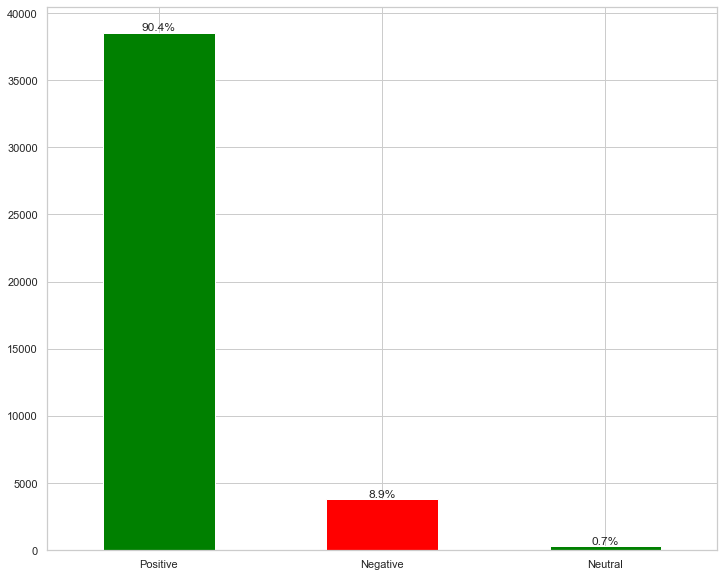

In [71]:
result = dfBlob2['Sentiment'].value_counts()

sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

ax = result.plot(kind="bar", rot=0, color=['green', 'red'])

# Ajouter des pourcentages aux barres
total = result.sum()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()


In [72]:
dfBlob3 = dfBlob2.groupby(['Reviewer_Location'],as_index=False).agg({'Rating':'mean'}).sort_values(by='Rating', ascending=True).head(10)
dfBlob3.style.background_gradient(cmap="bwr", subset=['Rating'])

,Reviewer_Location,Rating
147,Turks and Caicos Islands,1.500000
136,Suriname,2.000000
132,South Sudan,2.000000
39,Ecuador,2.333333
58,Haiti,3.000000
36,Democratic Republic of the Congo,3.000000
128,Slovenia,3.000000
107,Northern Mariana Islands,3.000000
129,Solomon Islands,3.000000
41,El Salvador,3.000000


In [73]:
dfBlob2.groupby("Sentiment").count()

,Rating,Reviewer_Location,Review_Text,Branch,month,year,review length,tokens,frequency,polarity,subjectivity
Sentiment,,,,,,,,,,,
Negative,3805,3805,3805,3805,3573,3573,3805,3805,3805,3805,3805
Neutral,308,308,308,308,282,282,308,308,308,308,308
Positive,38543,38543,38543,38543,36188,36188,38543,38543,38543,38543,38543


In [74]:
dfBlob2.groupby("polarity").max()

,Rating,Reviewer_Location,Review_Text,Branch,month,year,review length,tokens,frequency,subjectivity,Sentiment
polarity,,,,,,,,,,,
-1.000000,4,United States,i have been to disney florida times and the a...,Disneyland_HongKong,7.0,2018.0,193,"[i, have, been, to, disney, florida, times, an...",42,1.000000,Negative
-0.862500,2,United Kingdom,disappointed with no characters walking around...,Disneyland_Paris,3.0,2015.0,228,"[disappointed, with, no, characters, walking, ...",41,0.862500,Negative
-0.800000,5,Canada,food was boring if you didnt dine go to the pl...,Disneyland_California,3.0,2012.0,129,"[food, was, boring, if, you, didnt, dine, go, ...",23,0.975000,Negative
-0.750000,5,United States,what is there not to like about disneyland you...,Disneyland_Paris,8.0,2016.0,149,"[what, is, there, not, to, like, about, disney...",29,1.000000,Negative
-0.714286,3,United States,iwent there when the measles were going arounl...,Disneyland_California,9.0,2014.0,122,"[iwent, there, when, the, measles, were, going...",25,0.857143,Negative
...,...,...,...,...,...,...,...,...,...,...,...
0.916667,4,Singapore,splendid experience to hk disneyland with nig...,Disneyland_HongKong,1.0,2017.0,104,"[splendid, experience, to, hk, disneyland, wit...",17,1.000000,Positive
0.925000,5,United States,ridemax wwwridemaxcom is absolutely awesome we...,Disneyland_California,8.0,2012.0,297,"[ridemax, wwwridemaxcom, is, absolutely, aweso...",45,1.000000,Positive
0.933333,5,United States,wonderful experience especially love the india...,Disneyland_California,5.0,2015.0,176,"[wonderful, experience, especially, love, the,...",38,0.900000,Positive


In [75]:
dfBlob2["polarity"].sort_values(ascending=False)

18408    1.0000
23579    1.0000
19672    1.0000
40206    1.0000
962      1.0000
          ...  
25208   -0.8000
36706   -0.8625
9604    -1.0000
19225   -1.0000
10544   -1.0000
Name: polarity, Length: 42656, dtype: float64

In [76]:
Positive_comment = dfBlob2.iloc[18408 ,2]
Positive_comment

'its disneyland best park ever its so quaintunlike disney world its a wonderful escape away from the world to come and play with the family'

In [77]:
Negativve_comment =  dfBlob2.iloc[10544,2]
Negativve_comment

'been to one been to all gets a bit boring after a while but i suppose you have to do what the kids say you got to do'

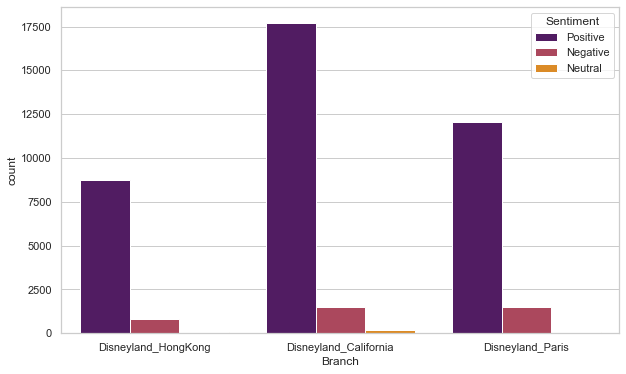

In [78]:
# Sentiment - Repartition
plt.figure(figsize=(10,6))
sns.countplot(data=dfBlob2,x='Branch',hue='Sentiment',palette='inferno');

In [79]:
dfBlob3.columns

Index(['Reviewer_Location', 'Rating'], dtype='object')

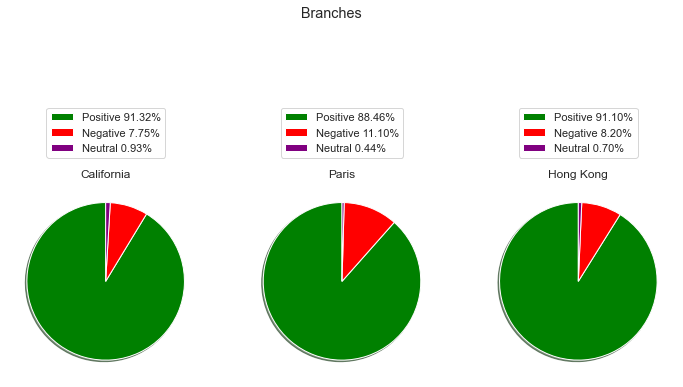

In [80]:
df_cal = dfBlob2.loc[dfBlob2['Branch'] == 'Disneyland_California']
df_par = dfBlob2.loc[dfBlob2['Branch'] == 'Disneyland_Paris']
df_hon = dfBlob2.loc[dfBlob2['Branch'] == 'Disneyland_HongKong']

# Obtenir les données pour chaque branche
label_cal = df_cal['Sentiment'].value_counts(sort=True).index
size_cal = df_cal['Sentiment'].value_counts(sort=True)

label_par = df_par['Sentiment'].value_counts(sort=True).index
size_par = df_par['Sentiment'].value_counts(sort=True)

label_hon = df_hon['Sentiment'].value_counts(sort=True).index
size_hon = df_hon['Sentiment'].value_counts(sort=True)

fig, axes = plt.subplots(1, 3, figsize=(12, 8), sharey=False)
fig.suptitle('Branches')

# Graphique pour California
wedges_cal, _, autotexts_cal = axes[0].pie(size_cal, labels=None, startangle=90, shadow=1, autopct='', colors=['green', 'red', 'purple'])
axes[0].set_title('California')
axes[0].legend(wedges_cal, [f'{l} {s/sum(size_cal)*100:.2f}%' for l, s in zip(label_cal, size_cal)], loc='lower center', bbox_to_anchor=(0.5, 1.1))

# Graphique pour Paris
wedges_par, _, autotexts_par = axes[1].pie(size_par, labels=None, startangle=90, shadow=1, autopct='', colors=['green', 'red', 'purple'])
axes[1].set_title('Paris')
axes[1].legend(wedges_par, [f'{l} {s/sum(size_par)*100:.2f}%' for l, s in zip(label_par, size_par)], loc='lower center', bbox_to_anchor=(0.5, 1.1))

# Graphique pour Hong Kong
wedges_hon, _, autotexts_hon = axes[2].pie(size_hon, labels=None, startangle=90, shadow=1, autopct='', colors=['green', 'red', 'purple'])
axes[2].set_title('Hong Kong')
axes[2].legend(wedges_hon, [f'{l} {s/sum(size_hon)*100:.2f}%' for l, s in zip(label_hon, size_hon)], loc='lower center', bbox_to_anchor=(0.5, 1.1))

plt.setp(autotexts_cal, visible=False)
plt.setp(autotexts_par, visible=False)
plt.setp(autotexts_hon, visible=False)

plt.show()


## Sentiment Reviews : 

- #### **Negative Reviews** 

In [81]:
dfNeg = dfBlob2[dfBlob2['Sentiment'] == 'Negative']

In [82]:
dfNeutre = dfBlob2[dfBlob2['Sentiment'] == "Neutral"]

In [83]:
dfPos = dfBlob2[dfBlob2['Sentiment'] == "Positive"]

In [84]:
Tot = dfBlob2.shape[0]
Neg = dfNeg.shape[0]
Pos = dfPos.shape[0]
Neu = dfNeutre.shape[0]

In [85]:
PerSentiment = [Neg, Pos, Neu]
percentage_list = []

for i in PerSentiment:
    SentPer = round((i / Tot) * 100, 2)
    percentage_list.append(SentPer)

print(percentage_list)


[8.92, 90.36, 0.72]


In [86]:
print(f"{dfNeg.shape} -> {percentage_list[0]}% Negative !")
print(f"{dfPos.shape} -> {percentage_list[1]}% Positive !")
print(f"{dfNeg.shape} -> {percentage_list[2]}% Neutral !")

(3805, 12) -> 8.92% Negative !
(38543, 12) -> 90.36% Positive !
(3805, 12) -> 0.72% Neutral !


In [87]:
#pip install spacy

In [88]:
#!python -m spacy download en_core_web_lg


In [89]:
df_dislike = dfNeg
review = df_dislike['Review_Text'].drop_duplicates()
all_sentences = []

# Collecter toutes les phrases uniques dans la colonne 'Review_Text'
for word in review:
    all_sentences.append(word)

lines = []  # Liste pour stocker les mots individuels
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)

import re

# Supprimer les caractères spéciaux de chaque mot
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines2 = []

# Filtrer les mots vides (vides) de la liste de lignes
for word in lines:
    if word != '':
        lines2.append(word)

from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))

import spacy
nlp = spacy.load('en_core_web_lg')
stem2 = []

# Filtrer les mots de liaison à l'aide des mots de liaison par défaut de SpaCy
for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

df = pd.DataFrame(stem2)
df = df[0].value_counts()

df = df[:20]

from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

nlp = spacy.load('en_core_web_sm') 
nlp.max_length = 2000000000000

str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

# Extraire les entités nommées et créer un dataframe avec les mots et les entités correspondantes
label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns=['Word', 'Entity'])


In [90]:
df6['Entity'].value_counts()
negative= df6.groupby(['Entity']).size().to_frame('count').reset_index()
negative.sort_values(by='count', ascending=False)[:10]
fig = px.pie(negative, values='count', names='Entity')
fig.show()

In [91]:
df6.head()

,Word,Entity
0,anaheim,ORG
1,tokyo,GPE
2,hong kong,GPE
3,one,CARDINAL
4,weekends,DATE


### TIME WORDS 

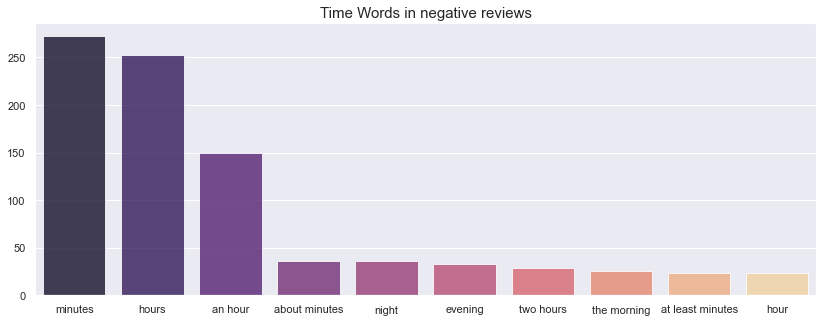

In [92]:
TIME = df6.query("Entity == 'TIME'")
TIME =TIME['Word'].value_counts()
TIME = TIME[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
TIME = sns.barplot(x=TIME.index,y= TIME.values, alpha=0.8,palette="magma");
plt.title('Time Words in negative reviews',fontsize=15);
plt.show();

Note : 

 -> Making visitors waits about one hour or more drives them to write negative reviews . 

### Name Words :

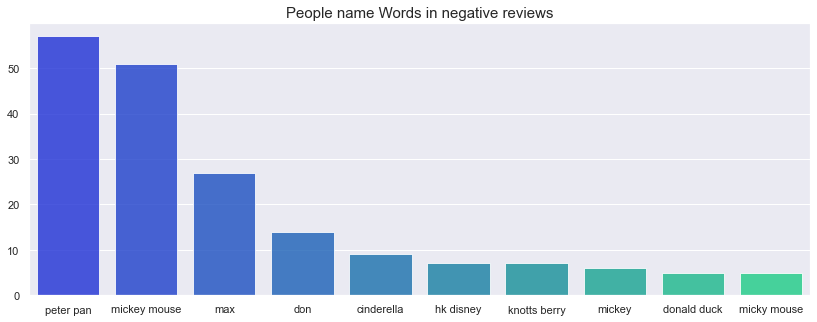

In [93]:
PERSON = df6.query("Entity == 'PERSON'")
PERSON =PERSON['Word'].value_counts()
PERSON = PERSON[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
PERSON = sns.barplot(x=PERSON.index,y= PERSON.values, alpha=0.8,palette="winter");
plt.title('People name Words in negative reviews',fontsize=15);
plt.show();

### Peter pan & Mickey mouse Negativ-reviews : Check 

In [94]:
dfBlob2['check']=dfBlob2['Review_Text'].apply(lambda word:word.count('peter pan'))
df_don=dfBlob2.loc[dfBlob2['check']>0]
print(df_don['Review_Text'].values[3:4])
print('\n')
print(df_don['Review_Text'].values[4:5])
print('\n')
print(df_don['Review_Text'].values[47:48])

['to me it seemed like disney on a smaller scale all the same rides but smaller the lines went long at all i live in japan and used to the long lines and fastpass sellout before  however here it wasnt the case whats annoying is the chinese give you no personal space ive lived in tokyo for  years so im accustom to being packed in tight on trains but everyone is polite there i felt like i was getting grinded on waiting to ride peter pan']


['ll preface this with admitting that i love all things disney i am an american and i have been to both disneyland in california and walt disney world many times over multiple decades i ve also been the disneyland paris but that was  years ago  i was traveling for work and had the opportunity to spend  days at disneyland this review is of the park itself without taking into consideration hotels transportation or other things that may exist at one of the usa resorts it is strictly a review and some comparisons to other versions of the disneyland park o

In [95]:
dfBlob2['check']=dfBlob2['Review_Text'].apply(lambda word:word.count('mickey mouse'))
df_don=dfBlob2.loc[dfBlob2['check']>0]
print(df_don['Review_Text'].values[3:4])
print('\n')
print(df_don['Review_Text'].values[4:5])
print('\n')
print(df_don['Review_Text'].values[47:48])

['we bought the  day ticket please try as much as possible to spend  days here there is so much to do to take in to absorb and to enjoy go on every ride possible doesnt matter if you feel too young for it go on it this park is truly out of this world dont even miss the shows will entertain disney fans young and old do everything touristy mickey mouse waffles star wars churro minnie ice cream pics with characters toys and souveneirs most of all take tons of pics the memories will never leave you']


['it has been a dream for me to celebrate my birthday in a very happy place and yes it did happenthanks to my supportive kids and husbandwell since i am a mickey mouse lover i couldnt contain my happiness when i first stepped out of that train and felt that super cold welcoming breeze at hk disneyland  fun rides we all really had fun with all the rides i loved the mystic mano and iron man experiencefood oh i find it too expensive downsideweather when you plan to visit in december make sure t

Note : 

- Visitors of Disneyland California complain about the length of the queues for Peter Pan's game

- Visitors of Disneyland Paris Complain about the shut of peter pan game

### Ordinal Words: 

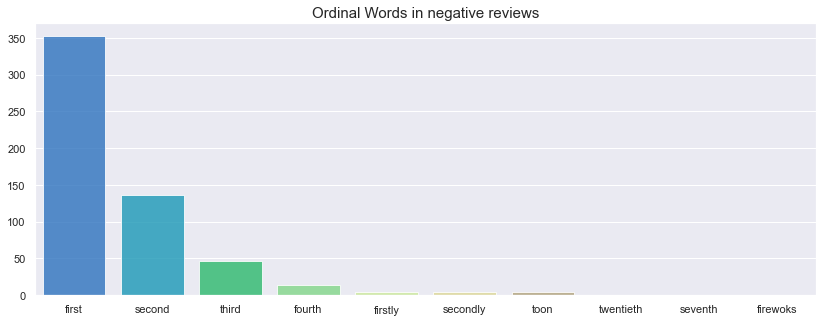

In [96]:
ORDINAL = df6.query("Entity == 'ORDINAL'")        
ORDINAL =ORDINAL['Word'].value_counts()
ORDINAL = ORDINAL[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
PERSON = sns.barplot(x=ORDINAL.index,y= ORDINAL.values, alpha=0.8,palette="terrain");
plt.title('Ordinal Words in negative reviews',fontsize=15);
plt.show();

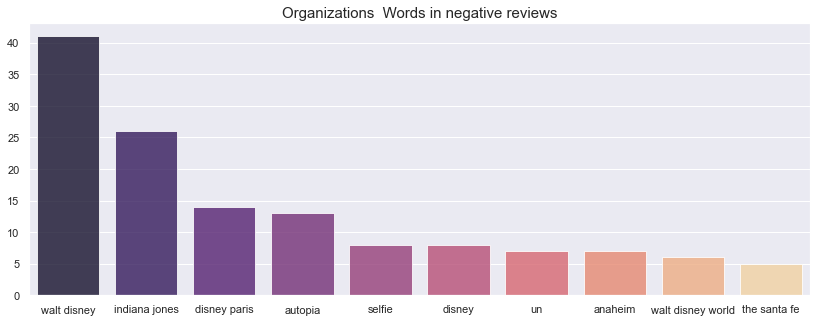

In [97]:
ORG = df6.query("Entity == 'ORG'")        
ORG =ORG['Word'].value_counts()
ORG = ORG[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
ORG = sns.barplot(x=ORG.index,y= ORG.values, alpha=0.8,palette="magma");
plt.title('Organizations  Words in negative reviews',fontsize=15);
plt.show();

In [98]:
dfBlob2['check']=dfBlob2['Review_Text'].apply(lambda word:word.count('walt disney'))
df_don=dfBlob2.loc[dfBlob2['check']>0]
print(df_don['Review_Text'].values[3:4])
print('\n')
print(df_don['Review_Text'].values[4:5])
print('\n')
print(df_don['Review_Text'].values[47:48])

['having previously been to walt disney world i decided to take my kids to hong kong disneyland for their first disney park experience this decision was mainly based on it being a smaller park so a little bit easier on their little legs they absolutely adored it my six year old went on every ride apart from rc racer due to height and apart from mystic manor which he found a little scary he loved them all the look of delight in my three year old s face was also sweet it was a fantastic warmer for the bigger parks in the usa one day park definitely not we did every single ride apart from rc racer and tarzan s house and every single show apart from moana and parades net characters did none of the gardens and we just fit it into two days and we were there from open to close with a stack of fast passes in hand maybe we were slowed down due to having little kids with us but i don t know how people do the park in one day and do it justice where the park lost a star was the food and merchandis

Note : 

- This game is really special, although it was mentioned in negative reviews but still recommended by visitors

### Nation Words

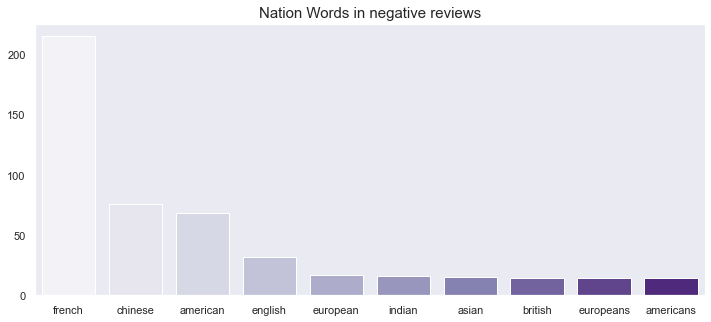

In [99]:
NORP = df6.query("Entity == 'NORP'")        
NORP =NORP['Word'].value_counts()
NORP = NORP[:10]
sns.set_style("dark")
plt.figure(figsize=(12,5));
NORP = sns.barplot(x=NORP.index,y= NORP.values, alpha=1,palette="Purples");
plt.title('Nation Words in negative reviews',fontsize=15);
plt.show();

In [100]:
df_copy = dfBlob2
df_copy['check']=df_copy['Review_Text'].apply(lambda word:word.count('french'))
df_don=df_copy.loc[df_copy['check']>0]
df_don=df_don.loc[df_don['Sentiment']=='Negative']
df_don[:5]

,Rating,Reviewer_Location,Review_Text,Branch,month,year,review length,tokens,frequency,polarity,subjectivity,Sentiment,check
8751,4,Philippines,admittedly food in theme parks are not that ch...,Disneyland_HongKong,11.0,2011.0,453,"[admittedly, food, in, theme, parks, are, not,...",80,-0.125000,0.640000,Negative,1
10971,2,United States,we had a very disappointing experience at disn...,Disneyland_California,5.0,2018.0,1727,"[we, had, a, very, disappointing, experience, ...",328,-0.041867,0.422733,Negative,1
10973,1,United Kingdom,in la for a few days and thought what could be...,Disneyland_California,5.0,2018.0,897,"[in, la, for, a, few, days, and, thought, what...",175,-0.104861,0.376528,Negative,1
13086,5,United States,take uber or lyft from your hotel which will s...,Disneyland_California,4.0,2017.0,1183,"[take, uber, or, lyft, from, your, hotel, whic...",224,-0.072270,0.455814,Negative,1
16704,1,United States,we were subjected to the worst food service on...,Disneyland_California,1.0,2016.0,470,"[we, were, subjected, to, the, worst, food, se...",82,-0.134167,0.729167,Negative,1


In [101]:
df_copy = dfBlob2
df_copy['check']=df_copy['Review_Text'].apply(lambda word:word.count('french'))
df_don=df_copy.loc[df_copy['check']>0]
df_don=df_don.loc[df_don['Sentiment']=='Negative']
print(df_don['Review_Text'].values[51:52])
print('\n')
print(df_don['Review_Text'].values[5:6])
print('\n')
print(df_don['Review_Text'].values[20:21])

['disappointed too many attractions closed food halls dirty and loads of flies some seriously rude staff one women tried to up sell my daughter when she wanted a brioche and a drink for the offer price of   she tried telling her she couldnt do it and she had to buy the expensive cup we havent been for ten years and it still felt like same old no wow factor for us anymore even after so long i think the quality of the food is disappointing the french in my opinion just cant do disney attitudes are poor unenthusiastic miserable this is definitely our last time here wouldnt waste our money that said for a first time experience it will still be ok as long as you havent experienced florida the true home of disney in my opinion save up and go there']


['we went six years apart hated the first timeloved the second time the difference the second time we went outside the french school holidays so there were no queues for the attractions or to see the characters another difference was that we sp

Note : 
 - foreign visitors to Disney Land Paris faces some issues with queue


### Location Words 

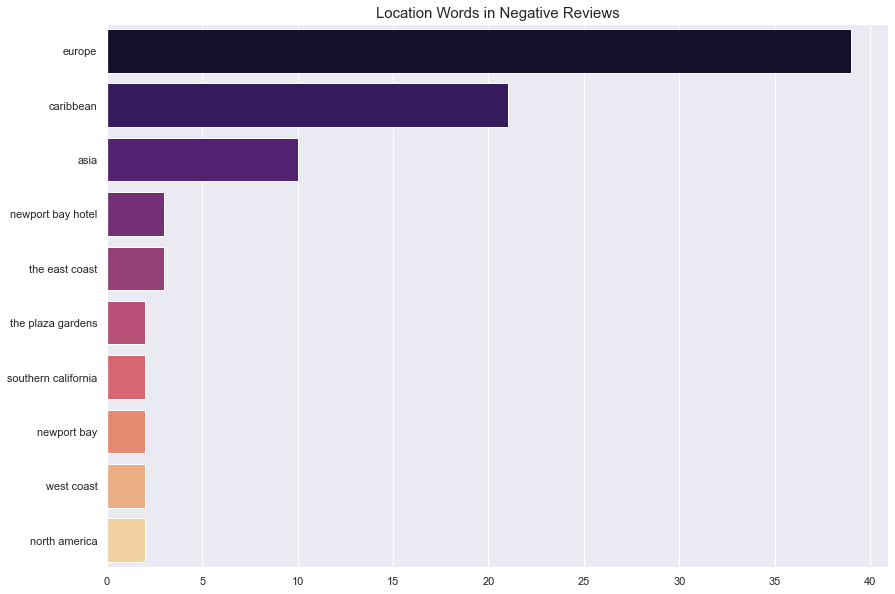

In [102]:
LOC = df6.query("Entity == 'LOC'")
LOC = LOC['Word'].value_counts()
LOC = LOC[:10]

sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
NORP = sns.barplot(x=LOC.values, y=LOC.index, alpha=1, palette="magma")  # Inversion des valeurs x et y
plt.title('Location Words in Negative Reviews', fontsize=15)
plt.show()


In [103]:
#Check European negative review
df_copy['check']=df_copy['Review_Text'].apply(lambda word:word.count('europe'))
df_don=df_copy.loc[df_copy['check']>0]
df_don=df_don.loc[df_don['Sentiment']=='Negative']
print(df_don['Review_Text'].values[1:2])
print('\n')
print(df_don['Review_Text'].values[5:6])
print('\n')
print(df_don['Review_Text'].values[6:7])


['i regret not getting the  day pass as one day is not enough in trying all the attractions in disney especially if you come on a weekend we met a few uncouth dancers who allowed some european guests to take a pic with her but refused us the queues to take a picture with the disney characters are usually jam packed']


['what a dump this place is from the disgusting toilets to the other visitors just smoking wherever they like the characters are not wandering around the park like the adverts show you have to queue for mins for a photo buzz lightyear or the teenager exploited in the costume wouldnt even wave at my  year old son  the disney magic may exist in america but in europe it is dead due to the lazy attitude of the staff my son and daughter were nearly crushed as hundred on people queue on the bridge to take photos of some fountains the staff didnt care dont waste your money thomas land at dayton manner is loads better value']


['just back from a  night stay have left separate r

### MONEY WORDS :

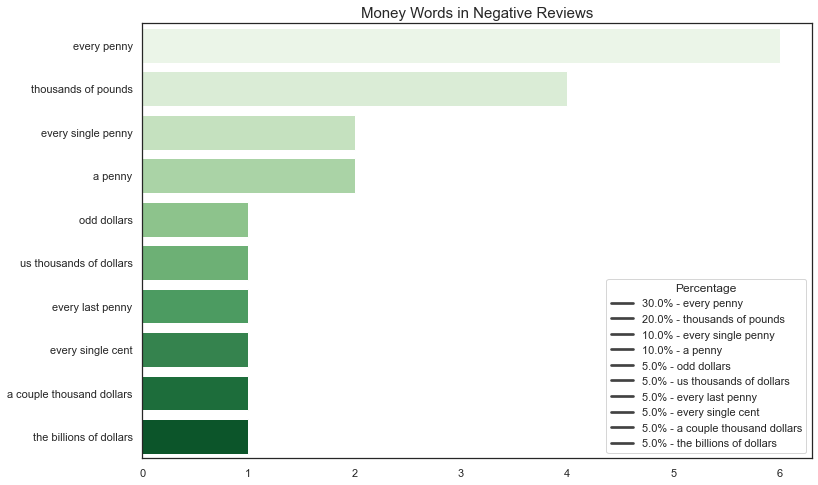

In [104]:
PRODUCT = df6.query("Entity == 'MONEY'")
PRODUCT = PRODUCT['Word'].value_counts()
PRODUCT = PRODUCT[:10]

sns.set_style("white")
plt.figure(figsize=(12, 8))
NORP = sns.barplot(x=PRODUCT.values, y=PRODUCT.index, alpha=1, palette="Greens")

# Calculer les pourcentages
total = sum(PRODUCT.values)
percentages = [(v / total) * 100 for v in PRODUCT.values]

# Créer une légende en bas à droite avec les pourcentages et les couleurs
legend_labels = [f'{p:.1f}% - {w}' for p, w in zip(percentages, PRODUCT.index)]
plt.legend(legend_labels, title='Percentage', loc='lower right')

plt.title('Money Words in Negative Reviews', fontsize=15)
plt.show()


## Sentiment Reviews : 

- #### **Positive Reviews**  -> Random sample(shape : 1000)

In [105]:
dfPos.shape

(38543, 12)

In [106]:
import pandas as pd
import numpy as np

# Supposons que votre DataFrame s'appelle df et contient toutes vos données

# Obtenir le nombre total de lignes dans le DataFrame
total_rows = len(dfPos)

# Définir le nombre de lignes que vous souhaitez extraire (1000 dans cet exemple)
num_rows_to_extract = 1000

# Générer des indices aléatoires pour les lignes à extraire
random_indices = np.random.choice(total_rows, size=num_rows_to_extract, replace=True)

# Extraire les lignes correspondantes en utilisant les indices aléatoires
random_df = dfPos.iloc[random_indices]

# Afficher le DataFrame extrait
print(random_df)


       Rating Reviewer_Location  \
22879       5     United States   
5037        4       Philippines   
7880        5         Australia   
19596       2     United States   
36040       4     United States   
...       ...               ...   
14768       4     United States   
4132        5       Philippines   
37539       5            France   
9238        5             India   
7753        5          Malaysia   

                                             Review_Text  \
22879  we have been annual passholders for three year...   
5037   the lion king show was amazing it made me tear...   
7880   we visited disneyland last week with our famil...   
19596  it took  minutes in line and there were only  ...   
36040  just returned from a night  day visit to disne...   
...                                                  ...   
14768  my  year old daughter and my  year old son enj...   
4132   the happiest place on earth is hongkong disney...   
37539  disney is always magic and in pa

In [107]:
random_df.shape

(1000, 12)

In [108]:
df_like = random_df
review = df_like['Review_Text'].drop_duplicates()
all_sentences = []

# Collecter toutes les phrases uniques dans la colonne 'Review_Text'
for word in review:
    all_sentences.append(word)

lines = []  # Liste pour stocker les mots individuels
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)

import re

# Supprimer les caractères spéciaux de chaque mot
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines2 = []

# Filtrer les mots vides (vides) de la liste de lignes
for word in lines:
    if word != '':
        lines2.append(word)

from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))

import spacy
nlp = spacy.load('en_core_web_lg')
stem2 = []

# Filtrer les mots de liaison à l'aide des mots de liaison par défaut de SpaCy
for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

df = pd.DataFrame(stem2)
df = df[0].value_counts()

df = df[:20]

from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

nlp = spacy.load('en_core_web_sm') 
nlp.max_length = 2000000000000

str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

# Extraire les entités nommées et créer un dataframe avec les mots et les entités correspondantes
label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns=['Word', 'Entity'])

In [109]:
df6['Entity'].value_counts()
negative= df6.groupby(['Entity']).size().to_frame('count').reset_index()
negative.sort_values(by='count', ascending=False)[:10]
fig = px.pie(negative, values='count', names='Entity')
fig.show()

In [110]:
df6.head()

,Word,Entity
0,annual,DATE
1,three years,DATE
2,mickey,PERSON
3,my year old,DATE
4,first week of december,DATE


### TIME WORLD

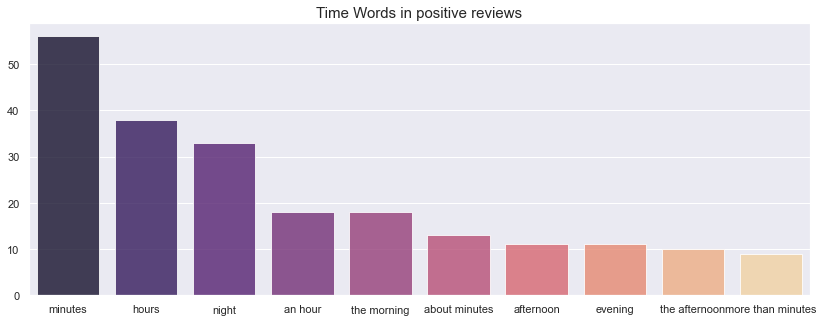

In [111]:
TIME = df6.query("Entity == 'TIME'")
TIME =TIME['Word'].value_counts()
TIME = TIME[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
TIME = sns.barplot(x=TIME.index,y= TIME.values, alpha=0.8,palette="magma");
plt.title('Time Words in positive reviews',fontsize=15);
plt.show();

Note : 

- 

### Name World :

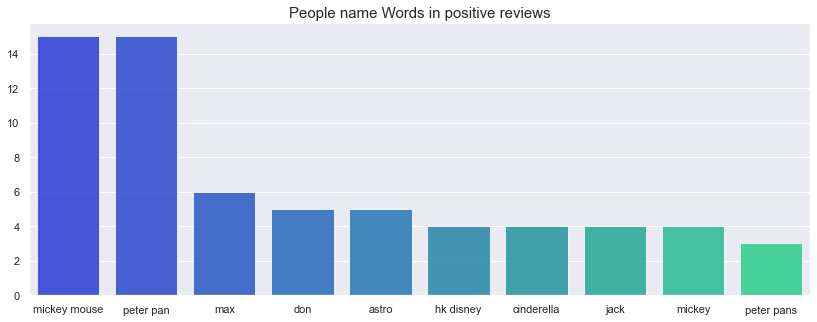

In [112]:
PERSON = df6.query("Entity == 'PERSON'")
PERSON =PERSON['Word'].value_counts()
PERSON = PERSON[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
PERSON = sns.barplot(x=PERSON.index,y= PERSON.values, alpha=0.8,palette="winter");
plt.title('People name Words in positive reviews',fontsize=15);
plt.show();

### Check Positive Review :

In [113]:
dfBlob2['check']=dfBlob2['Review_Text'].apply(lambda word:word.count('mickey mouse'))
df_don=dfBlob2.loc[dfBlob2['check']>0]
print(df_don['Review_Text'].values[3:4])
print('\n')
print(df_don['Review_Text'].values[4:5])
print('\n')
print(df_don['Review_Text'].values[47:48])

['we bought the  day ticket please try as much as possible to spend  days here there is so much to do to take in to absorb and to enjoy go on every ride possible doesnt matter if you feel too young for it go on it this park is truly out of this world dont even miss the shows will entertain disney fans young and old do everything touristy mickey mouse waffles star wars churro minnie ice cream pics with characters toys and souveneirs most of all take tons of pics the memories will never leave you']


['it has been a dream for me to celebrate my birthday in a very happy place and yes it did happenthanks to my supportive kids and husbandwell since i am a mickey mouse lover i couldnt contain my happiness when i first stepped out of that train and felt that super cold welcoming breeze at hk disneyland  fun rides we all really had fun with all the rides i loved the mystic mano and iron man experiencefood oh i find it too expensive downsideweather when you plan to visit in december make sure t

Note : 

- Good vibe | Funny park | Good place for celebrate a birthday

### Ordinal Words : 

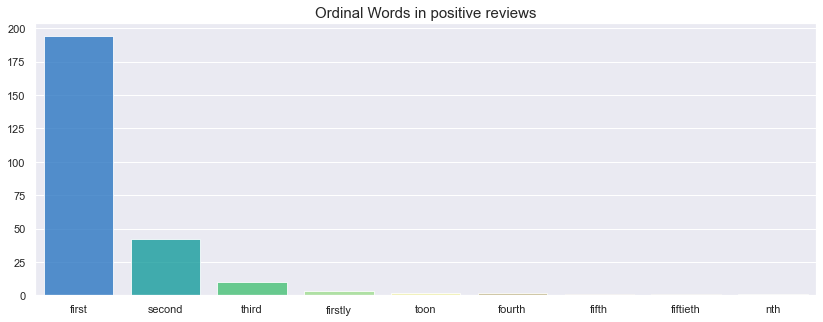

In [114]:
ORDINAL = df6.query("Entity == 'ORDINAL'")        
ORDINAL =ORDINAL['Word'].value_counts()
ORDINAL = ORDINAL[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
PERSON = sns.barplot(x=ORDINAL.index,y= ORDINAL.values, alpha=0.8,palette="terrain");
plt.title('Ordinal Words in positive reviews',fontsize=15);
plt.show();

### Organisation Words:

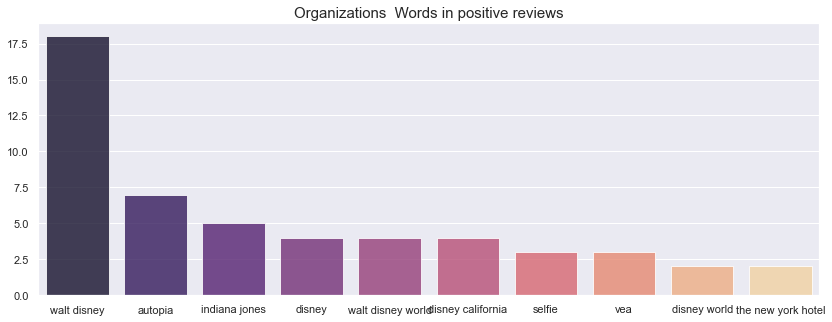

In [115]:
ORG = df6.query("Entity == 'ORG'")        
ORG =ORG['Word'].value_counts()
ORG = ORG[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
ORG = sns.barplot(x=ORG.index,y= ORG.values, alpha=0.8,palette="magma");
plt.title('Organizations  Words in positive reviews',fontsize=15);
plt.show();

In [116]:
dfBlob2['check']=dfBlob2['Review_Text'].apply(lambda word:word.count('walt disney'))
df_don=dfBlob2.loc[dfBlob2['check']>0]
print(df_don['Review_Text'].values[3:4])
print('\n')
print(df_don['Review_Text'].values[4:5])
print('\n')
print(df_don['Review_Text'].values[47:48])

['having previously been to walt disney world i decided to take my kids to hong kong disneyland for their first disney park experience this decision was mainly based on it being a smaller park so a little bit easier on their little legs they absolutely adored it my six year old went on every ride apart from rc racer due to height and apart from mystic manor which he found a little scary he loved them all the look of delight in my three year old s face was also sweet it was a fantastic warmer for the bigger parks in the usa one day park definitely not we did every single ride apart from rc racer and tarzan s house and every single show apart from moana and parades net characters did none of the gardens and we just fit it into two days and we were there from open to close with a stack of fast passes in hand maybe we were slowed down due to having little kids with us but i don t know how people do the park in one day and do it justice where the park lost a star was the food and merchandis

Note :

- Good Organization | Weather good | Good vibes

### Nation Words

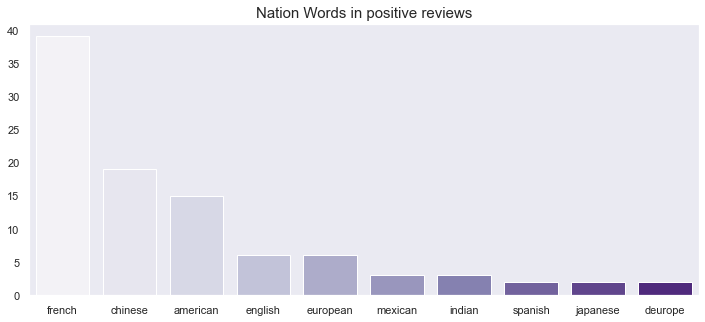

In [117]:
NORP = df6.query("Entity == 'NORP'")        
NORP =NORP['Word'].value_counts()
NORP = NORP[:10]
sns.set_style("dark")
plt.figure(figsize=(12,5));
NORP = sns.barplot(x=NORP.index,y= NORP.values, alpha=1,palette="Purples");
plt.title('Nation Words in positive reviews',fontsize=15);
plt.show();

In [118]:
df_copy = dfBlob2
df_copy['check']=df_copy['Review_Text'].apply(lambda word:word.count('french'))
df_don=df_copy.loc[df_copy['check']>0]
df_don=df_don.loc[df_don['Sentiment']=='Positive']
df_don[:5]

,Rating,Reviewer_Location,Review_Text,Branch,month,year,review length,tokens,frequency,polarity,subjectivity,Sentiment,check
285,5,United States,hong kong disneyland has the magic of the magi...,Disneyland_HongKong,12.0,2018.0,976,"[hong, kong, disneyland, has, the, magic, of, ...",176,0.103606,0.569398,Positive,1
392,5,United Kingdom,this isnt as big as either american disneys ab...,Disneyland_HongKong,8.0,2018.0,570,"[this, isnt, as, big, as, either, american, di...",100,0.112745,0.298039,Positive,2
585,4,Canada,while not nearly as robust as it s japanese fr...,Disneyland_HongKong,9.0,2018.0,818,"[while, not, nearly, as, robust, as, it, s, ja...",146,0.198913,0.462681,Positive,1
1091,4,India,disneyland does not need a review its majestic...,Disneyland_HongKong,4.0,2018.0,779,"[disneyland, does, not, need, a, review, its, ...",152,0.086310,0.449405,Positive,1
1454,5,Kenya,we stayed at the disneyland hotel and it was w...,Disneyland_HongKong,12.0,2017.0,601,"[we, stayed, at, the, disneyland, hotel, and, ...",109,0.269143,0.510606,Positive,1


In [119]:
df_copy = dfBlob2
df_copy['check']=df_copy['Review_Text'].apply(lambda word:word.count('french'))
df_don=df_copy.loc[df_copy['check']>0]
df_don=df_don.loc[df_don['Sentiment']=='Positive']
print(df_don['Review_Text'].values[51:52])
print('\n')
print(df_don['Review_Text'].values[5:6])
print('\n')
print(df_don['Review_Text'].values[20:21])

['we frequent the disney parks in florida much more frequently than the ones in california but had to make the trip west for the anniversary celebration the last time we were in disneyland was for the th anniversary and not much has changed as far as attractions more has changed in california adventure separate review our plan was to spend an entire day at disneyland another at california adventure and the third a combo of the two covering the attractions missed on the first two days most disney fans upon arrival at the destination city would go to the main park first disneyland in anaheim and magic kingdom in orlando we thought the same but made the mistake of making our first day a saturday when planning this trip i knew the may be more crowded than usual this year because of the anniversary as well as the halloween season but i had no idea that my weekend days would include a themed weekend which would draw even more people than a regular weekend the crowds turned out to be almost u

### Location world 

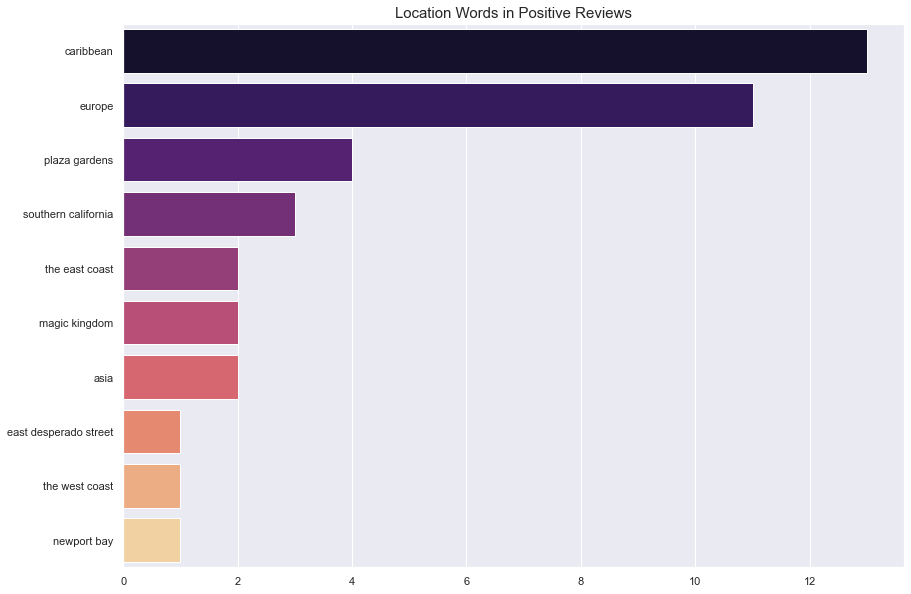

In [120]:
LOC = df6.query("Entity == 'LOC'")
LOC = LOC['Word'].value_counts()
LOC = LOC[:10]

sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
NORP = sns.barplot(x=LOC.values, y=LOC.index, alpha=1, palette="magma")  # Inversion des valeurs x et y
plt.title('Location Words in Positive Reviews', fontsize=15)
plt.show()

In [121]:
#Check European positive review
df_copy['check']=df_copy['Review_Text'].apply(lambda word:word.count('europe'))
df_don=df_copy.loc[df_copy['check']>0]
df_don=df_don.loc[df_don['Sentiment']=='Positive']
print(df_don['Review_Text'].values[1:2])
print('\n')
print(df_don['Review_Text'].values[5:6])
print('\n')
print(df_don['Review_Text'].values[6:7])

['smaller in scale and less attractive than the ones in japan and europe but its still a good place to spend your saturday or sunday with your friends or families i think they stopped the fireworks at night already']


['there are  ways to go to disneyland from hong kong international airport  disney train direct to disneyland  airport train ride and a bus ride  taxi we ended up taking a taxi as it worked out cheaper and it took less than  minutes to get there it was fairly early in the morning around am and disneyland itself didn t open until am so we went straight to the hotel and had buffet breakfast at the restaurant where some of the disney characters will come out and interact with the guests and take pictures with you we also ended up keeping our luggage at their storage for free they also have free shuttles going to from disneyland from the two hotels in the area that runs every half hour if you are going direct to disneyland they have lockers for your things onsite too and it 

Note : 

- Good place with friends | Good path join park | Good expérience

### Money Words 

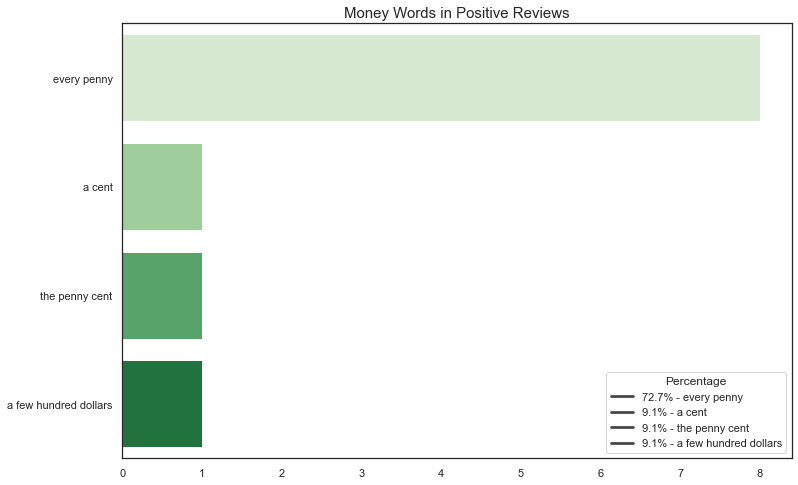

In [122]:
PRODUCT = df6.query("Entity == 'MONEY'")
PRODUCT = PRODUCT['Word'].value_counts()
PRODUCT = PRODUCT[:10]

sns.set_style("white")
plt.figure(figsize=(12, 8))
NORP = sns.barplot(x=PRODUCT.values, y=PRODUCT.index, alpha=1, palette="Greens")

# Calculer les pourcentages
total = sum(PRODUCT.values)
percentages = [(v / total) * 100 for v in PRODUCT.values]

# Créer une légende en bas à droite avec les pourcentages et les couleurs
legend_labels = [f'{p:.1f}% - {w}' for p, w in zip(percentages, PRODUCT.index)]
plt.legend(legend_labels, title='Percentage', loc='lower right')

plt.title('Money Words in Positive Reviews', fontsize=15)
plt.show()